In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('creditcard.csv')

Display top 5 and last 5 Rows of the DataSet

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Shape of Our DataSet (Number of rows and number of Columns)

In [7]:
data.shape

(284807, 31)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of Rows 284807
Number of columns 31


Information About our dataset
(Total number of rows, columns, data type of each column and memory requirement)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Check Null Values in The Data Set

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
#in our data sets all the values are in the same range except the amount column.
#so we are going to use standard scaler for feature scaling our amount column (only for amount column)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# creating instance of standard scaler
sc = StandardScaler()

data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [15]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:

data = data.drop(['Time'],axis = 1)

In [17]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [18]:
data.shape

(284807, 30)

In [19]:
# checking for duplicate values
data.duplicated().any()

True

In [20]:

data = data.drop_duplicates()

In [21]:
data.shape

(275663, 30)

In [22]:
284807-275663

9144

In [23]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

Class
0    99.828414
1     0.171586
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

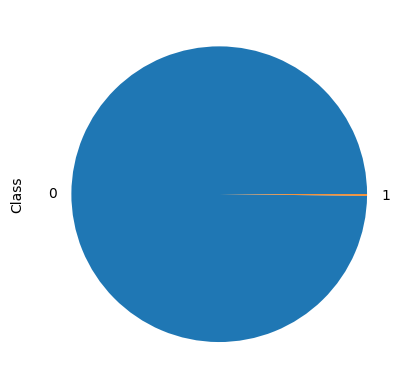

In [26]:
#checking the class distribution of the target count variable in percentage
print((data.groupby('Class')['Class'].count()/data['Class'].count()) *100)
((data.groupby('Class')['Class'].count()/data['Class'].count()) *100).plot.pie()

Store Feature Matrix In X and Response(Target) in vector Y

In [27]:
X = data.drop(columns='Class', axis = 1) 
y = data['Class']

'\nwe are going to store out feature matrix in X mens our independent variables in X\nand our responser also called as the target variable or dependent variable in  vector Y\n'

Splitting the Data set into the training set And Test set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.2, stratify = y, random_state= 2)


'  \nstratify = y\nit means I want to stratify the data based on Y\n\nIf we dont mention this Y then, distribution of 0 and 1 can be very different in the training data and testning data\nso when we do stratify , there will be evenly distributed two classes in both x_train and x_test\n\nrandom_state = 2\nhow do u want to split your data \nit helps in reproducing the same output\n\n'

### Handling Imbalaced DataSet

In [147]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [153]:
y.shape

(275663,)

In [152]:
X.shape

(275663, 29)

In [154]:
#importing smote
from imblearn.over_sampling import SMOTE


In [155]:
X_res,y_res = SMOTE().fit_resample(X,y) # passing independent varaible and dependent variable

In [156]:
y_res.shape

(550380,)

In [164]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [165]:
# now we are having same no of samples in legit and fraudlent transaction

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size= 0.2, random_state= 42)


### Logistic Regression

In [170]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred5 = log.predict(X_test)

In [172]:
accuracy_score(y_test,y_pred5)

0.9444020494930775

In [173]:
precision_score(y_test,y_pred5)

0.9729300903620286

In [174]:
recall_score(y_test,y_pred5)

0.9141683180917405

In [175]:
f1_score(y_test,y_pred5)

0.9426343219226877

### Decision Tree Classifier

In [176]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [177]:
y_pred6 = dt.predict(X_test)

In [178]:
accuracy_score(y_test,y_pred6)

0.9982012427777173

In [179]:
precision_score(y_test,y_pred6)

0.9974945988634919

In [180]:
f1_score(y_test,y_pred6)

0.9982013734966025

In [181]:
recall_score(y_test,y_pred6)

0.9989091504099776

### Random Classifier

In [182]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [183]:
y_pred7 = rf.predict(X_test)

In [184]:
accuracy_score(y_test,y_pred7)

0.999918238308078

In [185]:
f1_score(y_test,y_pred7)

0.9999181929736854

In [186]:
recall_score(y_test,y_pred7)

1.0

In [187]:
precision_score(y_test,y_pred7)

0.9998363993310551

In [192]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
                            "ACC":[accuracy_score(y_test,y_pred5)*100,
                                   accuracy_score(y_test,y_pred6)*100,
                                   accuracy_score(y_test,y_pred7)*100              
                          ]})

<AxesSubplot:xlabel='Models', ylabel='ACC'>

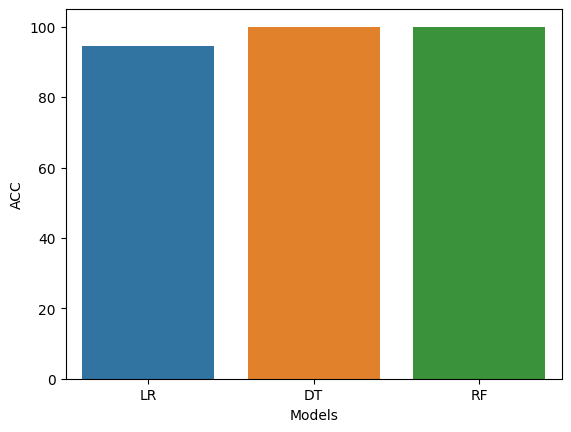

In [193]:
sns.barplot(x = 'Models', y = 'ACC', data = final_data)